# Multiple Linear Regression

## Importing the libraries

In [585]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## Importing the dataset

In [586]:
%matplotlib inline
sns.set_style('whitegrid')
df = pd.read_csv('Life Expectancy Data.csv')
df.head(5)


,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Encoding the dataset

In [587]:
# We encode the colums 'Country' and 'Status'
df["Country"]= df["Country"].astype('category')
df.dtypes
df["Status"]= df["Status"].astype('category')
df.dtypes
df["Country"]= df["Country"].cat.codes
df["Status"]= df["Status"].cat.codes
df.head(5)


,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Raw data visualisation and statistics

In [588]:
df.describe()

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,...,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,95.096324,2007.518720,0.825732,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,...,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,56.244904,4.613841,0.379405,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,...,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,0.000000,2000.000000,0.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,46.000000,2004.000000,1.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,...,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,93.000000,2008.000000,1.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,...,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,145.000000,2012.000000,1.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,...,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,192.000000,2015.000000,1.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,...,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [589]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,1,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,192,2003,1,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,192,2002,1,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,192,2001,1,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


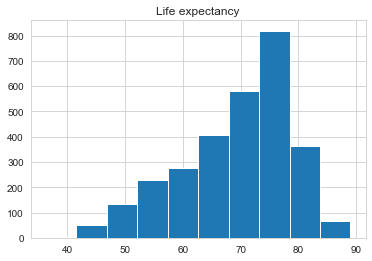

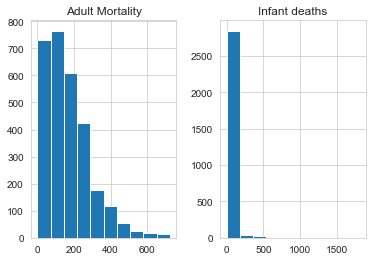

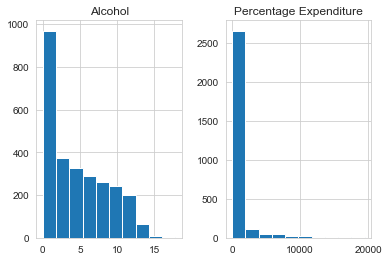

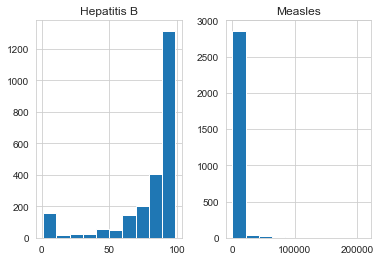

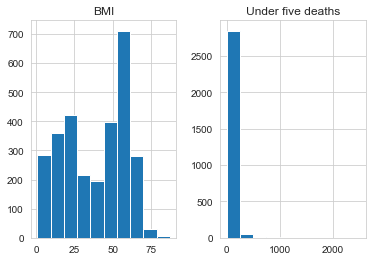

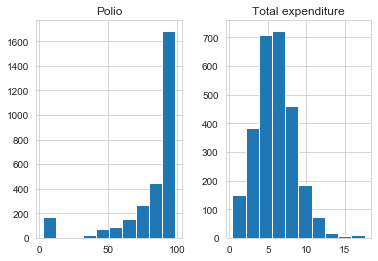

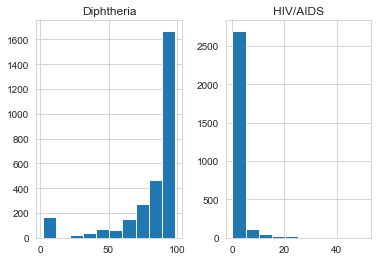

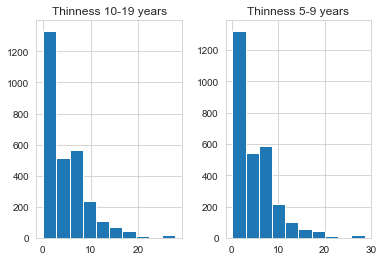

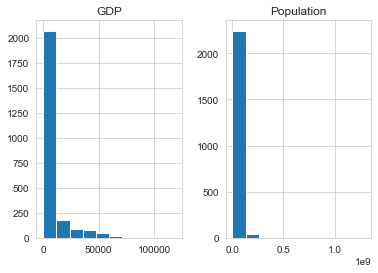

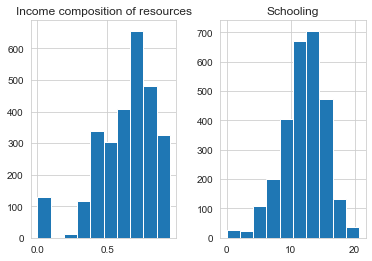

In [590]:
# histogram plots to visualise data distribution
from matplotlib import pyplot
df.hist(column = ['Life expectancy'])
df.hist(column = ['Adult Mortality','Infant deaths'])
df.hist(column = ['Alcohol', 'Percentage Expenditure'])
df.hist(column = ['Hepatitis B', 'Measles'])
df.hist(column = ['Under five deaths', 'BMI'])
df.hist(column = ['Polio', 'Total expenditure'])
df.hist(column = ['Diphtheria', 'HIV/AIDS'])
df.hist(column = ['Thinness 5-9 years','Thinness 10-19 years'])
df.hist(column = ['GDP', 'Population'])
df.hist(column = ['Income composition of resources', 'Schooling'])
pyplot.show()


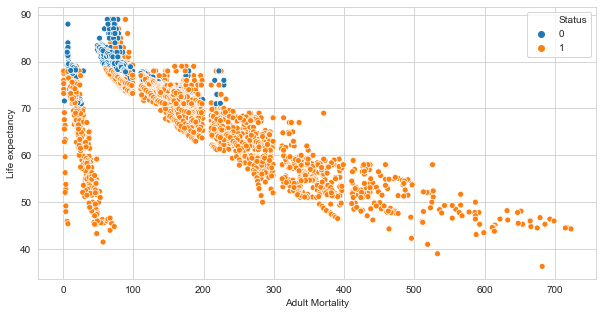

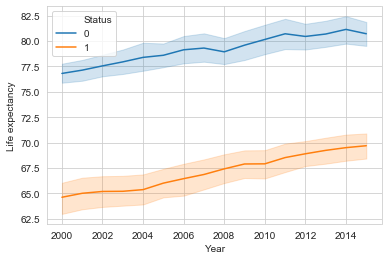

In [591]:
# scatter plots
plt.figure(figsize=(10, 5))
sns.set_style()
sns.scatterplot(data=df, y='Life expectancy', x='Adult Mortality', hue='Status')
plt.show()
# Life expectancy trend over years
sns.lineplot(data=df, y='Life expectancy', x='Year', hue='Status')
plt.show()

# #Taking care of missing data

In [545]:
df.isnull().sum() 

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
Infant deaths                        0
Alcohol                            194
Percentage Expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
Under five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness 10-19 years                34
Thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [546]:
sum(df.isnull().sum())

2563


## Data cleaning Statregy: <br> 

1)Remove with null life expectancy<br>
2)Group the dataframe by countires<br>
3)Missing GDP and population can be filled by mean or the previous year value if available, as these are not expected to change significantly over a year for a country <br>
4)Alcohol consumption filled by mean since it value which is not <br> <br>


|Attributes          |No. missing values|    Outlier; Missing data strategy |<br>

Life expectancy                     10    In range (0, 120); Remove the rows;<br>
Adult Mortality                     10    In range (0, 1000); Replace with Mean or previous year;<br>
infant deaths                        0    In rnage (0, 1000); Replace with mean;<br>
Alcohol                            194    None, Replace with mean <br>
percentage expenditure               0    In range >0 <br>
Hepatitis B                        553    In range (0, 100] <br>
Measles                              0    In range (0, 1000) <br>
BMI                                34    In rnage (0, 100] <br>
under-five deaths                    0    In range (0, 1000) <br>
Polio                               19    In range (0, 100] <br>
Total expenditure                  226    None <br>
Diphtheria                          19    In range (0,100] <br>
HIV/AIDS                            0    In range (0, 100) <br>
GDP                                448    > 0; mean or previous year <br>
Population                         652    > 0; mean or previous year <br>
thinness  1-19 years               34    (0, 100); Mean or previous year <br>
 thinness 5-9 years                 34    (0, 100); Mean or previous year <br>
Income composition of resources    167    (0,1]; Mean or previous year <br>
Schooling                          163    >0; Mean or previous year <br>

In [592]:
indexNames01 = df[(df['Life expectancy'] > 120)].index
indexNames01

df.drop(indexNames01 , inplace=True)

In [593]:
# indexNames = dfObj[ (dfObj['Age'] >= 30) & (dfObj['Age'] <= 40) ].index
# dfObj.drop(indexNames , inplace=True)
df

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,1,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,192,2003,1,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,192,2002,1,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,192,2001,1,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [594]:
indexNames02 = df[(df['Adult Mortality'] > 1000 )].index
indexNames02

df.drop(indexNames02 , inplace=True)
df

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,1,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,192,2003,1,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,192,2002,1,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,192,2001,1,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [595]:
indexNames03 = df[(df['Infant deaths'] > 1000 )].index
indexNames03

df.drop(indexNames03 , inplace=True)
df


,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,1,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,192,2003,1,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,192,2002,1,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,192,2001,1,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [480]:
indexNames04 = df[(df['Hepatitis B'] > 100 )].index
indexNames04

df.drop(indexNames04 , inplace=True)
df


,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,1,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,192,2003,1,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,192,2002,1,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,192,2001,1,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [596]:
indexNames05 = df[(df['Measles'] > 1000 )].index
indexNames05

df.drop(indexNames05 , inplace=True)
df

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Income composition of resources,Schooling
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
11,0,2004,1,57.0,293.0,87,0.02,15.296066,67.0,466,...,5.0,8.79,5.0,0.1,219.141353,24118979.0,19.5,19.7,0.381,6.8
12,0,2003,1,56.7,295.0,87,0.01,11.089053,65.0,798,...,41.0,8.82,41.0,0.1,198.728544,2364851.0,19.7,19.9,0.373,6.5
16,1,2015,1,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932,192,2005,1,44.6,717.0,28,4.14,8.717409,65.0,420,...,69.0,6.44,68.0,30.3,444.765750,129432.0,9.0,9.0,0.406,9.3
2933,192,2004,1,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,192,2003,1,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,192,2002,1,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0


In [597]:
indexNames06 = df[(df['Under five deaths'] > 1000 )].index
indexNames06

df.drop(indexNames06 , inplace=True)
df

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Income composition of resources,Schooling
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
11,0,2004,1,57.0,293.0,87,0.02,15.296066,67.0,466,...,5.0,8.79,5.0,0.1,219.141353,24118979.0,19.5,19.7,0.381,6.8
12,0,2003,1,56.7,295.0,87,0.01,11.089053,65.0,798,...,41.0,8.82,41.0,0.1,198.728544,2364851.0,19.7,19.9,0.373,6.5
16,1,2015,1,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932,192,2005,1,44.6,717.0,28,4.14,8.717409,65.0,420,...,69.0,6.44,68.0,30.3,444.765750,129432.0,9.0,9.0,0.406,9.3
2933,192,2004,1,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,192,2003,1,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,192,2002,1,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0


In [598]:
indexNames06 = df[(df['Under five deaths'] > 1000 )].index
indexNames06

df.drop(indexNames06 , inplace=True)
df

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Income composition of resources,Schooling
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
11,0,2004,1,57.0,293.0,87,0.02,15.296066,67.0,466,...,5.0,8.79,5.0,0.1,219.141353,24118979.0,19.5,19.7,0.381,6.8
12,0,2003,1,56.7,295.0,87,0.01,11.089053,65.0,798,...,41.0,8.82,41.0,0.1,198.728544,2364851.0,19.7,19.9,0.373,6.5
16,1,2015,1,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932,192,2005,1,44.6,717.0,28,4.14,8.717409,65.0,420,...,69.0,6.44,68.0,30.3,444.765750,129432.0,9.0,9.0,0.406,9.3
2933,192,2004,1,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,192,2003,1,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,192,2002,1,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0


In [599]:
df.isnull().sum() 

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
Infant deaths                        0
Alcohol                            170
Percentage Expenditure               0
Hepatitis B                        403
Measles                              0
BMI                                 22
Under five deaths                    0
Polio                               19
Total expenditure                  190
Diphtheria                          19
HIV/AIDS                             0
GDP                                361
Population                         557
Thinness 10-19 years                22
Thinness 5-9 years                  22
Income composition of resources    114
Schooling                          110
dtype: int64

In [605]:
sum(df.isnull().sum())

2029

In [606]:
missing_col_03 = df.iloc[:,3].isnull()

In [607]:
row = 0
missing_list = []
missing_rows = []
for i in missing_col_03:
    if (i == 1):
        missing_list.append(df.iloc[row:row+1,])
        missing_rows.append(row)
    row = row + 1
missing_rows
df.iloc[missing_rows,]

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Income composition of resources,Schooling
624,38,2013,1,NaN,NaN,0,0.01,0.000000,98.0,0,...,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,49,2013,1,NaN,NaN,0,0.01,11.419555,96.0,0,...,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1650,105,2013,1,NaN,NaN,0,0.01,871.878317,8.0,0,...,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1715,110,2013,1,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1812,117,2013,1,NaN,NaN,0,0.01,15.606596,87.0,0,...,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1909,124,2013,1,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1958,128,2013,1,NaN,NaN,0,NaN,344.690631,99.0,0,...,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2167,142,2013,1,NaN,NaN,0,8.54,0.000000,97.0,0,...,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2216,146,2013,1,NaN,NaN,0,0.01,0.000000,69.0,0,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,178,2013,1,NaN,NaN,0,0.01,78.281203,9.0,0,...,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


In [608]:
missing_rows = []
for col in range(0,21):
    g1 = df.iloc[:,col].isnull()
    row = 0
    missing_list = []
    for temp_row in g1:
        if (temp_row == 1):
            missing_list.append(df.iloc[row:row+1,])
            missing_rows.append(row)
        row = row + 1

# print(missing_list)
print(missing_rows)
df.iloc[missing_rows,]

[514, 643, 1381, 1442, 1511, 1567, 1602, 1774, 1823, 2247, 514, 643, 1381, 1442, 1511, 1567, 1602, 1774, 1823, 2247, 20, 31, 36, 52, 68, 82, 98, 114, 127, 143, 159, 164, 180, 196, 212, 228, 240, 256, 286, 301, 317, 333, 347, 356, 370, 381, 397, 419, 435, 448, 456, 472, 488, 515, 531, 547, 563, 579, 595, 611, 627, 644, 660, 687, 716, 732, 751, 767, 783, 793, 808, 824, 846, 857, 873, 889, 905, 917, 931, 947, 963, 979, 995, 1011, 1033, 1049, 1065, 1076, 1092, 1102, 1118, 1132, 1141, 1157, 1188, 1200, 1216, 1231, 1258, 1272, 1288, 1304, 1315, 1338, 1353, 1365, 1382, 1394, 1410, 1426, 1456, 1466, 1472, 1480, 1489, 1499, 1514, 1544, 1584, 1600, 1602, 1603, 1619, 1628, 1644, 1660, 1665, 1681, 1697, 1713, 1727, 1742, 1753, 1761, 1775, 1791, 1807, 1824, 1840, 1852, 1864, 1880, 1896, 1924, 1940, 1956, 1976, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2033, 2049, 2065, 2081, 2095, 2111, 2126, 2128, 2144, 2160, 2174, 2190, 2206, 2222, 2231, 2248, 2252,

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Income composition of resources,Schooling
624,38,2013,1,NaN,NaN,0,0.01,0.000000,98.0,0,...,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,49,2013,1,NaN,NaN,0,0.01,11.419555,96.0,0,...,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1650,105,2013,1,NaN,NaN,0,0.01,871.878317,8.0,0,...,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1715,110,2013,1,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1812,117,2013,1,NaN,NaN,0,0.01,15.606596,87.0,0,...,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805,184,2004,0,77.5,111.0,28,8.48,0.000000,92.0,37,...,92.0,15.14,96.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2806,184,2003,0,77.2,114.0,28,8.40,0.000000,92.0,56,...,91.0,15.60,96.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2807,184,2002,0,77.0,115.0,28,8.33,0.000000,88.0,41,...,9.0,14.55,94.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN
2808,184,2001,0,76.9,115.0,28,8.25,0.000000,89.0,116,...,89.0,13.73,94.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN


In [612]:
print("."*20 + " Total data before cleaning for Life expectancy " + str(sum(df.isnull().sum())) + " " + "."*20 +"\n")
print(df.isnull().sum())


print("\n\n" + "-- "*35 + "\n\n")

df1= df.dropna(subset=['Life expectancy'], axis=0)
print("."*20 + " Total data after cleaning for Life expectancy " + str(sum(df1.isnull().sum())) + " " + "."*20 +"\n")
print(df1.isnull().sum())

.................... Total data before cleaning for Life expectancy 2029 ....................

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
Infant deaths                        0
Alcohol                            170
Percentage Expenditure               0
Hepatitis B                        403
Measles                              0
BMI                                 22
Under five deaths                    0
Polio                               19
Total expenditure                  190
Diphtheria                          19
HIV/AIDS                             0
GDP                                361
Population                         557
Thinness 10-19 years                22
Thinness 5-9 years                  22
Income composition of resources    114
Schooling                          110
dtype: int64


-- -- -- -- -- -- -- -- -- -- --

In [611]:
df1

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Income composition of resources,Schooling
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
11,0,2004,1,57.0,293.0,87,0.02,15.296066,67.0,466,...,5.0,8.79,5.0,0.1,219.141353,24118979.0,19.5,19.7,0.381,6.8
12,0,2003,1,56.7,295.0,87,0.01,11.089053,65.0,798,...,41.0,8.82,41.0,0.1,198.728544,2364851.0,19.7,19.9,0.373,6.5
16,1,2015,1,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932,192,2005,1,44.6,717.0,28,4.14,8.717409,65.0,420,...,69.0,6.44,68.0,30.3,444.765750,129432.0,9.0,9.0,0.406,9.3
2933,192,2004,1,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,192,2003,1,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,192,2002,1,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0


In [610]:

grouped = df1.groupby(by=["Country"], axis=0)
grouped_GDP = grouped['GDP']
grouped_GDP.mean()
temp = grouped_GDP.transform(lambda x: x.fillna(x.mean()))
df1.iloc[:,16] = temp
print(df1.iloc[:,16].isnull().sum())
print(df.iloc[1240:1260,[0,16]])
print(df1.iloc[1240:1260,[0,16]])

327
      Country         GDP
1484       94  862.946312
1485       94  781.514594
1486       94   63.636279
1487       94   47.893950
1488       94  437.819184
1489       94  474.819788
1491       95  458.465173
1492       95  454.122224
1493       95  415.361958
1494       95  379.689583
1496       95   33.667491
1497       95  232.617320
1498       95   21.373329
1499       95  178.927990
1500       95  168.648254
1501       95  149.445255
1502       95  133.494518
1503       95  177.285187
1506       96         NaN
1507       96         NaN
      Country          GDP
1486       94    63.636279
1487       94    47.893950
1488       94   437.819184
1489       94   474.819788
1491       95   458.465173
1492       95   454.122224
1493       95   415.361958
1494       95   379.689583
1496       95    33.667491
1497       95   232.617320
1498       95    21.373329
1499       95   178.927990
1500       95   168.648254
1501       95   149.445255
1502       95   133.494518
1503       95   17

/Users/garimasingh/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [613]:
print(df1.iloc[:,17].isnull().sum())
grouped_Population = grouped['Population']
grouped_Population.mean()
temp = grouped_Population.transform(lambda x: x.fillna(x.mean()))
df1.iloc[:,17] = temp
print(df1.iloc[:,17].isnull().sum())


549
545


/Users/garimasingh/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [614]:
print("."*20 + " Total data after cleaning replacing missing GDP and population with mean " + str(sum(df1.isnull().sum())) + " " + "."*20 +"\n")
print(df1.isnull().sum())

.................... Total data after cleaning replacing missing GDP and population with mean 1975 ....................

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
Infant deaths                        0
Alcohol                            169
Percentage Expenditure               0
Hepatitis B                        403
Measles                              0
BMI                                 20
Under five deaths                    0
Polio                               19
Total expenditure                  190
Diphtheria                          19
HIV/AIDS                             0
GDP                                356
Population                         545
Thinness 10-19 years                20
Thinness 5-9 years                  20
Income composition of resources    107
Schooling                          107
dtype: int64


In [615]:
df1

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Income composition of resources,Schooling
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
11,0,2004,1,57.0,293.0,87,0.02,15.296066,67.0,466,...,5.0,8.79,5.0,0.1,219.141353,24118979.0,19.5,19.7,0.381,6.8
12,0,2003,1,56.7,295.0,87,0.01,11.089053,65.0,798,...,41.0,8.82,41.0,0.1,198.728544,2364851.0,19.7,19.9,0.373,6.5
16,1,2015,1,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932,192,2005,1,44.6,717.0,28,4.14,8.717409,65.0,420,...,69.0,6.44,68.0,30.3,444.765750,129432.0,9.0,9.0,0.406,9.3
2933,192,2004,1,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,192,2003,1,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,192,2002,1,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0


In [616]:
df1= df1.dropna(subset=['GDP' and 'Population'], axis=0)
print(df1.isnull().sum())
print(sum(df1.isnull().sum()))

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
Infant deaths                        0
Alcohol                            137
Percentage Expenditure               0
Hepatitis B                        366
Measles                              0
BMI                                 20
Under five deaths                    0
Polio                               19
Total expenditure                  137
Diphtheria                          19
HIV/AIDS                             0
GDP                                 25
Population                           0
Thinness 10-19 years                20
Thinness 5-9 years                  20
Income composition of resources      0
Schooling                            0
dtype: int64
763


In [617]:
print(df1.iloc[:,8].isnull().sum())
grouped_Hepatitis = grouped['Hepatitis B']
grouped_Hepatitis.mean()
temp = grouped_Hepatitis.transform(lambda x: x.fillna(x.mean()))
df1.iloc[:,8] = temp
print(df1.iloc[:,8].isnull().sum())

366
123


/Users/garimasingh/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


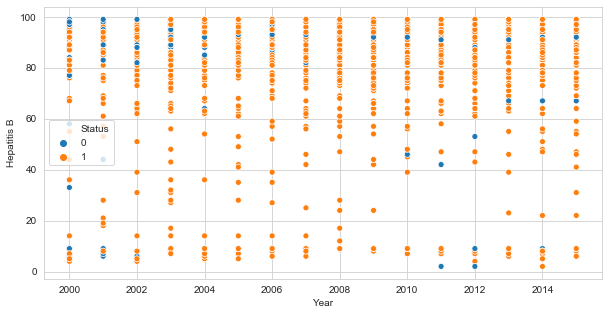

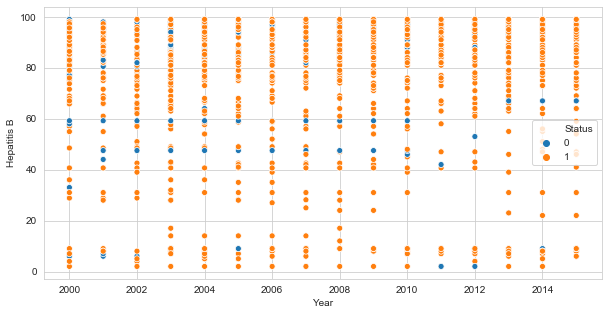

In [618]:
plt.figure(figsize=(10, 5))
sns.set_style()
sns.scatterplot(data=df, y='Hepatitis B', x='Year', hue='Status')
plt.show()
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df1, y='Hepatitis B', x='Year', hue='Status')
plt.show()

137
14


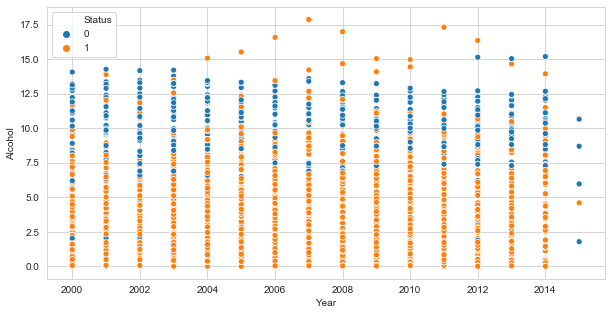

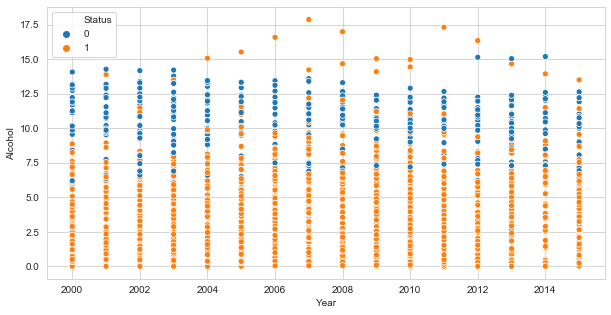

In [619]:
print(df1.iloc[:,6].isnull().sum())
grouped_Alcohol = grouped['Alcohol']
grouped_Alcohol.mean()
temp = grouped_Alcohol.transform(lambda x: x.fillna(x.mean()))
df1.iloc[:,6] = temp
print(df1.iloc[:,6].isnull().sum())
plt.figure(figsize=(10, 5))
sns.set_style()
sns.scatterplot(data=df, y='Alcohol', x='Year', hue='Status')
plt.show()
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df1, y='Alcohol', x='Year', hue='Status')
plt.show()

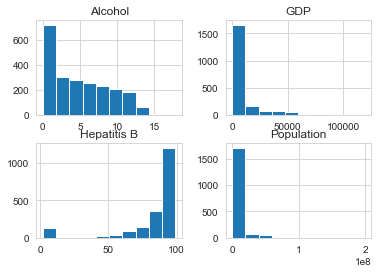

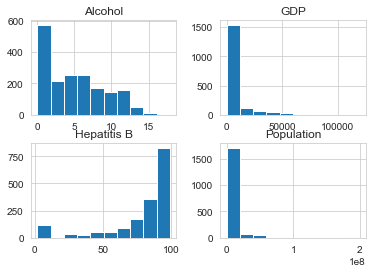

In [620]:
from matplotlib import pyplot
df.hist(column = ['GDP', 'Population','Hepatitis B', 'Alcohol'])
df1.hist(column = ['GDP', 'Population', 'Hepatitis B', 'Alcohol'])
pyplot.show()


In [621]:
print(df1.isnull().sum())
print(sum(df1.isnull().sum()))

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
Infant deaths                        0
Alcohol                             14
Percentage Expenditure               0
Hepatitis B                        123
Measles                              0
BMI                                 20
Under five deaths                    0
Polio                               19
Total expenditure                  137
Diphtheria                          19
HIV/AIDS                             0
GDP                                 25
Population                           0
Thinness 10-19 years                20
Thinness 5-9 years                  20
Income composition of resources      0
Schooling                            0
dtype: int64
397


137
0


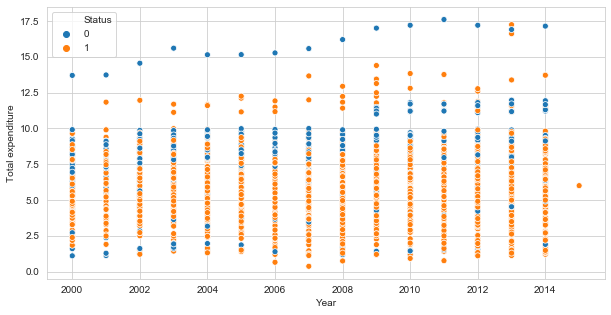

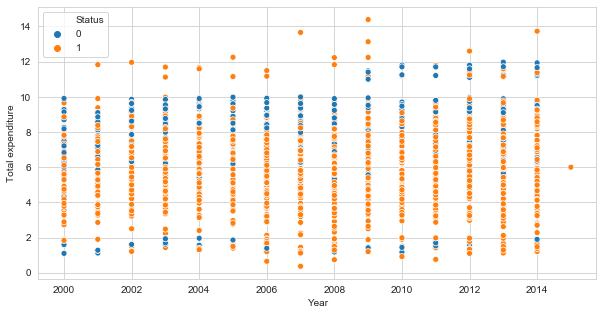

In [569]:
print(df1.iloc[:,13].isnull().sum())
grouped_Tot_exp = grouped['Total expenditure']
grouped_Tot_exp.mean()
temp = grouped_Tot_exp.transform(lambda x: x.fillna(x.mean()))
df1.iloc[:,6] = temp
print(df1.iloc[:,6].isnull().sum())
plt.figure(figsize=(10, 5))
sns.set_style()
sns.scatterplot(data=df, y='Total expenditure', x='Year', hue='Status')
plt.show()
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df1, y='Total expenditure', x='Year', hue='Status')
plt.show()


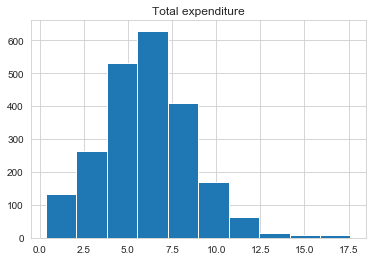

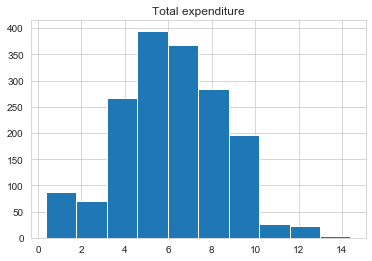

In [622]:
df.hist(column = ['Total expenditure'])
df1.hist(column = ['Total expenditure'])
pyplot.show()

In [623]:
print(df1.isnull().sum())
print(sum(df1.isnull().sum()))

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
Infant deaths                        0
Alcohol                             14
Percentage Expenditure               0
Hepatitis B                        123
Measles                              0
BMI                                 20
Under five deaths                    0
Polio                               19
Total expenditure                  137
Diphtheria                          19
HIV/AIDS                             0
GDP                                 25
Population                           0
Thinness 10-19 years                20
Thinness 5-9 years                  20
Income composition of resources      0
Schooling                            0
dtype: int64
397


In [624]:
df1

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Income composition of resources,Schooling
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
11,0,2004,1,57.0,293.0,87,0.02,15.296066,67.0,466,...,5.0,8.79,5.0,0.1,219.141353,24118979.0,19.5,19.7,0.381,6.8
12,0,2003,1,56.7,295.0,87,0.01,11.089053,65.0,798,...,41.0,8.82,41.0,0.1,198.728544,2364851.0,19.7,19.9,0.373,6.5
16,1,2015,1,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932,192,2005,1,44.6,717.0,28,4.14,8.717409,65.0,420,...,69.0,6.44,68.0,30.3,444.765750,129432.0,9.0,9.0,0.406,9.3
2933,192,2004,1,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,192,2003,1,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,192,2002,1,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0


In [625]:
df1= df1.dropna(axis=0)

In [626]:
print(df1.isnull().sum())
print(sum(df1.isnull().sum()))

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
Infant deaths                      0
Alcohol                            0
Percentage Expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
Under five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness 10-19 years               0
Thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64
0


In [627]:
df1

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Income composition of resources,Schooling
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
11,0,2004,1,57.0,293.0,87,0.02,15.296066,67.0,466,...,5.0,8.79,5.0,0.1,219.141353,24118979.0,19.5,19.7,0.381,6.8
12,0,2003,1,56.7,295.0,87,0.01,11.089053,65.0,798,...,41.0,8.82,41.0,0.1,198.728544,2364851.0,19.7,19.9,0.373,6.5
16,1,2015,1,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932,192,2005,1,44.6,717.0,28,4.14,8.717409,65.0,420,...,69.0,6.44,68.0,30.3,444.765750,129432.0,9.0,9.0,0.406,9.3
2933,192,2004,1,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,192,2003,1,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,192,2002,1,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0


## Visualising feature correlation

In [629]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df1_values=df1.values
df1_norm= min_max_scaler.fit_transform(df1_values[:, 3:])

#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()

#x = X.values #returns a numpy array
#x_scaled = min_max_scaler.fit_transform(x, Y)
df1_norm = pd.DataFrame(df1_norm, columns=['Life expectancy', 'Adult Mortality', 'Infant deaths', 'Alcohol', 'Percentage Expenditure ', 'Hepatitis B ', 'Measles', 'BMI', 'Under five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS ', 'GDP', 'Population', 'Thinness 10-19 years', 'Thinness 5-9 years', 'Income composition of resources', 'Schooling'])
df1_norm 

,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,0.447818,0.373961,0.116576,0.000000,0.003878,0.618557,0.492492,0.221039,0.097838,0.572917,0.557061,0.618557,0.000000,0.005094,0.001649,0.887755,0.878788,0.508547,0.483092
1,0.447818,0.369806,0.120219,0.000000,0.003861,0.639175,0.430430,0.214381,0.101251,0.614583,0.553495,0.639175,0.000000,0.005254,0.159707,0.897959,0.888889,0.502137,0.478261
2,0.392789,0.404432,0.158470,0.000560,0.000807,0.670103,0.466466,0.157124,0.136519,0.020833,0.600571,0.030928,0.000000,0.001791,0.121392,0.989796,0.989899,0.407051,0.328502
3,0.387097,0.407202,0.158470,0.000000,0.000585,0.649485,0.798799,0.151798,0.138794,0.395833,0.602710,0.402062,0.000000,0.001620,0.011902,1.000000,1.000000,0.398504,0.314010
4,0.787476,0.101108,0.000000,0.256999,0.019248,1.000000,0.000000,0.745672,0.000000,1.000000,0.401569,1.000000,0.000000,0.033135,0.000145,0.056122,0.060606,0.814103,0.685990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,0.157495,0.991690,0.051002,0.231243,0.000460,0.649485,0.420420,0.339547,0.048919,0.687500,0.432953,0.680412,0.598020,0.003685,0.000651,0.454082,0.449495,0.433761,0.449275
1574,0.151803,1.000000,0.049180,0.243561,0.000000,0.680412,0.031031,0.334221,0.047782,0.666667,0.482168,0.649485,0.663366,0.003765,0.064310,0.474490,0.469697,0.434829,0.444444
1575,0.155598,0.988920,0.047359,0.226764,0.000000,0.051546,0.998999,0.328895,0.046644,0.041667,0.438659,0.680412,0.724752,0.003757,0.063587,0.494898,0.494949,0.446581,0.458937
1576,0.161290,0.099723,0.045537,0.247480,0.000000,0.731959,0.304304,0.323569,0.045506,0.729167,0.439372,0.711340,0.786139,0.000434,0.000632,0.056122,0.060606,0.456197,0.483092


In [630]:
correlation=df1_norm.corr(method='pearson')
print(correlation)


                                 Life expectancy  Adult Mortality  \
Life expectancy                         1.000000        -0.690822   
Adult Mortality                        -0.690822         1.000000   
Infant deaths                          -0.370735         0.249200   
Alcohol                                 0.423933        -0.206078   
Percentage Expenditure                  0.414546        -0.247931   
Hepatitis B                             0.187139        -0.113966   
Measles                                -0.234967         0.153005   
BMI                                     0.579521        -0.389510   
Under five deaths                      -0.405561         0.272040   
Polio                                   0.352108        -0.207415   
Total expenditure                       0.209233        -0.121691   
Diphtheria                              0.375987        -0.199062   
HIV/AIDS                               -0.596395         0.546041   
GDP                               

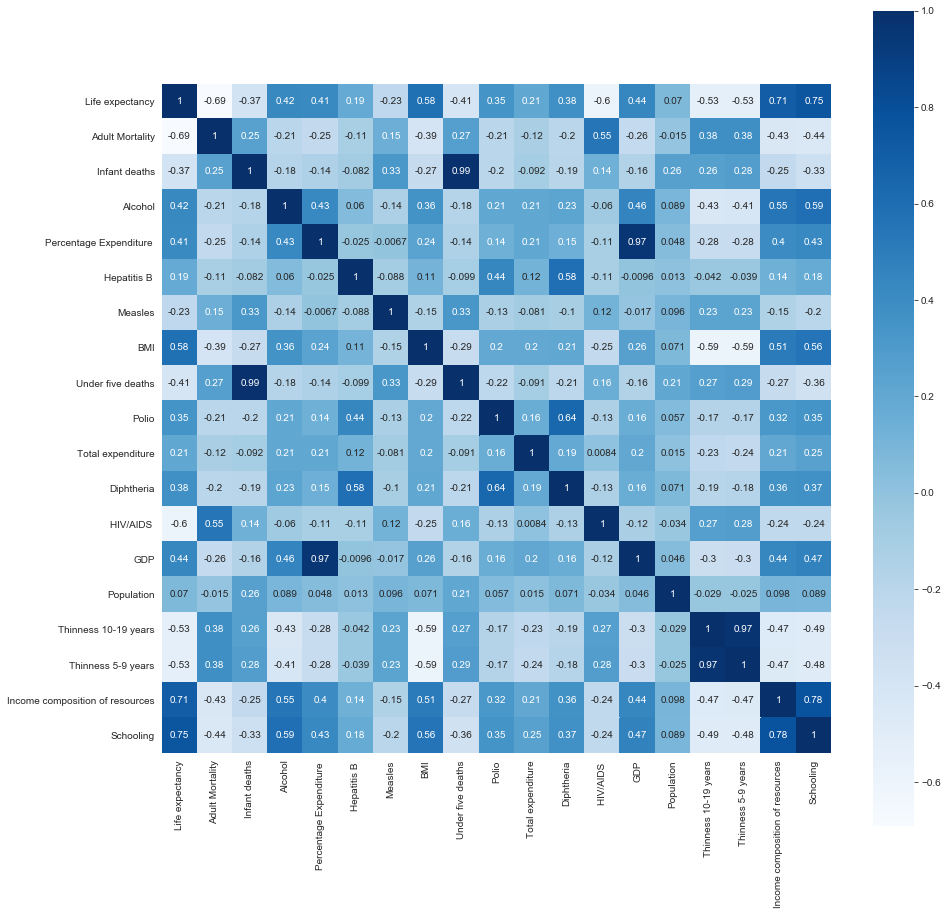

In [631]:
plt.figure(figsize=(15,15))
df1_corr = df1_norm.corr()

sns.heatmap(df1_norm.corr(), square=True, annot=True, cmap="Blues");

## Defining dependent and independent varialbes

In [635]:
Xx=df1_norm.iloc[:, 1:]
        #5 & 11, 18 & 19, 20 & 21
               #,4:21]#[4,5,6,7,8,10,11,12,13,14,15,16,18,19,20,21]] #4:21]  # [10,20]]   [4,7,10,15,16,18,19,20,21] [4:8,10:16,18:21]
Yy=df1_norm.iloc[:,0]
print(Xx)
print(Yy)

      Adult Mortality  Infant deaths   Alcohol  Percentage Expenditure   \
0            0.373961       0.116576  0.000000                 0.003878   
1            0.369806       0.120219  0.000000                 0.003861   
2            0.404432       0.158470  0.000560                 0.000807   
3            0.407202       0.158470  0.000000                 0.000585   
4            0.101108       0.000000  0.256999                 0.019248   
...               ...            ...       ...                      ...   
1573         0.991690       0.051002  0.231243                 0.000460   
1574         1.000000       0.049180  0.243561                 0.000000   
1575         0.988920       0.047359  0.226764                 0.000000   
1576         0.099723       0.045537  0.247480                 0.000000   
1577         0.948753       0.045537  0.095745                 0.000000   

      Hepatitis B    Measles       BMI  Under five deaths     Polio  \
0         0.618557  0.492492

## Splitting the dataset into the Training set and Test set

In [645]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xx, Yy, test_size = 0.2, random_state = 0)

In [646]:
print(X_test)

      Adult Mortality  Infant deaths   Alcohol  Percentage Expenditure   \
253          0.522161       0.043716  0.319709                 0.000592   
938          0.041551       0.109290  0.029115                 0.000194   
678          0.224377       0.009107  0.180291                 0.010744   
1108         0.394737       0.018215  0.043673                 0.001002   
1217         0.232687       0.000000  0.232923                 0.001318   
...               ...            ...       ...                      ...   
231          0.213296       0.001821  0.625980                 0.001708   
761          0.029086       0.009107  0.351624                 0.001289   
215          0.221607       0.127505  0.396976                 0.001598   
1249         0.174515       0.001821  0.534714                 0.048273   
55           0.018006       0.001821  0.221165                 0.000152   

      Hepatitis B    Measles       BMI  Under five deaths     Polio  \
253       0.835052  0.002002

## Dimension reduction

In [650]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components = 4)
#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)
#explained_variance = pca.explained_variance_ratio_
#print(explained_variance)

[0.52320384 0.26421721 0.11648099 0.09609796]


## Training the Multiple Linear Regression model on the Training set

In [647]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the Test set results

Mean Squared error Score:	 0.005692270084048333 
R^2 Error Score:		 0.7617800762767787


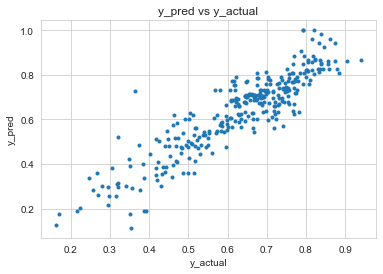

In [648]:
y_pred = regressor.predict(X_test)
plt.plot(y_pred,y_test,'.')
plt.title('y_pred vs y_actual')
plt.ylabel('y_pred')
plt.xlabel('y_actual')
from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(y_pred, y_test)
r2=r2_score(y_pred, y_test)
print('Mean Squared error Score:\t',mse,'\nR^2 Error Score:\t\t',r2)


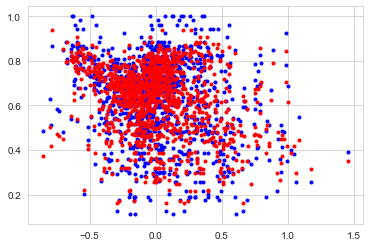

In [655]:
plt.plot(X_test,y_test,'.b')
plt.plot(X_test,y_pred,'.r')